<a href="https://colab.research.google.com/github/SalmanJubairJim6/ECGR_5105/blob/main/Gradient_Descent_Learning_Rate_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic data
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Normalize data for better convergence
x = (x - np.mean(x)) / np.std(x)

# Add bias term
X_b = np.c_[np.ones((100, 1)), x]  # Add x0 = 1 for bias term

# Function to compute cost (Mean Squared Error)
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient Descent Function
def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    theta = np.random.randn(2, 1)  # Initialize parameters randomly
    cost_history = []

    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history


In [2]:

# Interactive visualization of learning rates
def plot_gradient_descent(learning_rate):
    iterations = 50
    _, cost_history = gradient_descent(X_b, y, learning_rate=learning_rate, iterations=iterations)
    plt.figure(figsize=(8, 5))
    plt.plot(range(iterations), cost_history, label=f'Learning Rate: {learning_rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.title('Effect of Learning Rate on Gradient Descent Convergence')
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive widget
learning_rate_slider = widgets.FloatLogSlider(
    value=0.1,
    base=10,
    min=-3,  # 0.001
    max=0,   # 1.0
    step=0.1,
    description='Learning Rate',
    continuous_update=False
)

widgets.interactive(plot_gradient_descent, learning_rate=learning_rate_slider)

interactive(children=(FloatLogSlider(value=0.1, continuous_update=False, description='Learning Rate', max=0.0,…

In [3]:
theta_opt, cost = gradient_descent(X_b, y, learning_rate=0.1, iterations=10)
print("Optimized Theta:", theta_opt)
print("cost at optimized theta",cost[-1] )

Optimized Theta: [[4.34973558]
 [2.01656481]]
cost at optimized theta 3.525344775837881


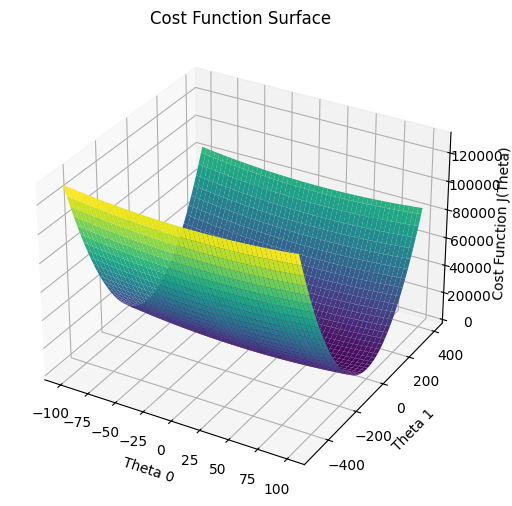

In [4]:

# Visualization of Cost Function Landscape
theta0_vals = np.linspace(-100, 100, 500)
theta1_vals = np.linspace(-500, 400, 100)
J_vals = np.zeros((len(theta1_vals), len(theta0_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[j, i] = compute_cost(t, X_b, y)

# Plot the cost function landscape
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost Function J(Theta)')
ax.set_title('Cost Function Surface')
plt.show()


# **What happens when the learning rate is too small?**
Answer: When the learning rate is very small, each update to the parameters (θ) is tiny. As a result, it takes many more iterations for the algorithm to make significant progress in reducing the cost. Because many iterations are required to approach the minimum, the process becomes computationally inefficient.

# **What happens when the learning rate is too large?**
With a very large learning rate, the updates are so big that the algorithm overshoots the minimum. Instead of gradually moving toward the bottom of the cost function “bowl,” the parameters may jump back and forth over the optimum. The cost may start increasing or exhibit oscillatory behavior rather than decreasing steadily. In extreme cases, the cost can even diverge.

# **What is the best learning rate for this dataset and why?**
Optimized Theta: [[4.66017242]
 [0.76922811]

In [5]:
theta_opt, cost = gradient_descent(X_b, y, learning_rate=0.1, iterations=10)
print("Optimized Theta:", theta_opt)
print("cost at optimized theta", cost[-1])


Optimized Theta: [[4.66017242]
 [0.76922811]]
cost at optimized theta 3.114761137948098
